# Лабороторна робота 1
# Дослідження та візуалізація даних за допомогою Python
## Мета: отримати базові навики використання Python для дослідження та візуалізації даних
## Варіант 3
Знайдіть добові втрати БТР

In [45]:
import csv
import numpy as np

data = []
with open('russia_losses_equipment.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header
    for row in csvreader:
        data.append(row)

data_np = np.array(data)
apc_losses = data_np[:, 5].astype(int)
daily_apc_losses = np.diff(apc_losses[::-1])[::-1]
daily_apc_losses = np.append(daily_apc_losses, apc_losses[-1])

daily_apc_losses

array([ 36,  17,  20,  17,  29,   9,  40,  23,  45,  33,  25,  30,  24,
        64,  39,  19,  51,  33,  30,  44,  19,  49,  27,  35,  14,  11,
        30,  31,  21,  31,  31,  17,  32,  44,  27,  38,  42,  52,  40,
        12,  40,  30,  52,  38,  39,  13,   3,   6,   8,  20,  40,  48,
        17,  13,  19,   9,  19,   0,   9,  21,  27,  35,  26,  24,  14,
        23,  18,  14,  19,  17,  11,  21,  32,  25,  21,  26,  15,   7,
        12,  35,  24,  17,  17,   5,  13,   9,   9,   9,  29,   8,  31,
        17,  27,   8,  42,  20,  38,   8,  21,  24,  11,  26,  13,  20,
        17,  46,  15,  19,  12,   9,  36,  15,  32,  24,  23,  17,  11,
        19,  40,  16,  18,  11,  17,  17,  16,  26,  19,  25,  21,   9,
        19,  18,  15,  15,  11,  35,  18,  12,  20,  18,   6,  29,  26,
        21,  11,  32,  13,  26,   9,  20,  40,  16,  18,  22,  33,  12,
        22,  22,  33,  40,  15,  17,  11,  27,  27,  22,  34,  35,  35,
        43,  14,  30,  48,  43,  42,  22,  40,  32,  35,  19,  1

Знайдіть 5 найбільших добових втрат БТР.

In [17]:
largest_losses = np.argsort(daily_apc_losses)[-5:]  # Get indices of the 5 largest losses
largest_losses_values = daily_apc_losses[largest_losses]  # Get the actual values

largest_losses_values

array([ 91,  96, 110, 120, 190])

Визначте, скільки БТР було знищено влітку 2023 року.

In [24]:
dates = data_np[:, 0]  # Dates in the first column

total_apc_destroyed = 0

# Loop through the data to sum losses for June, July, and August 2023
for i in range(len(dates)):
    date_str = dates[i]
    year = int(date_str.split('-')[0])  # Extract year
    month = int(date_str.split('-')[1])  # Extract month

    if year == 2023 and month in [6, 7, 8]:
        total_apc_destroyed += daily_apc_losses[i]

total_apc_destroyed

np.int64(1132)

In [47]:
days = data_np[:, 1].astype(int)

filtered_apc_losses = daily_apc_losses[(days >= 100) & (days <= 500)]

average_apc_destroyed = np.mean(filtered_apc_losses) if filtered_apc_losses.size > 0 else 0

average_apc_destroyed

np.float64(11.468827930174564)

Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

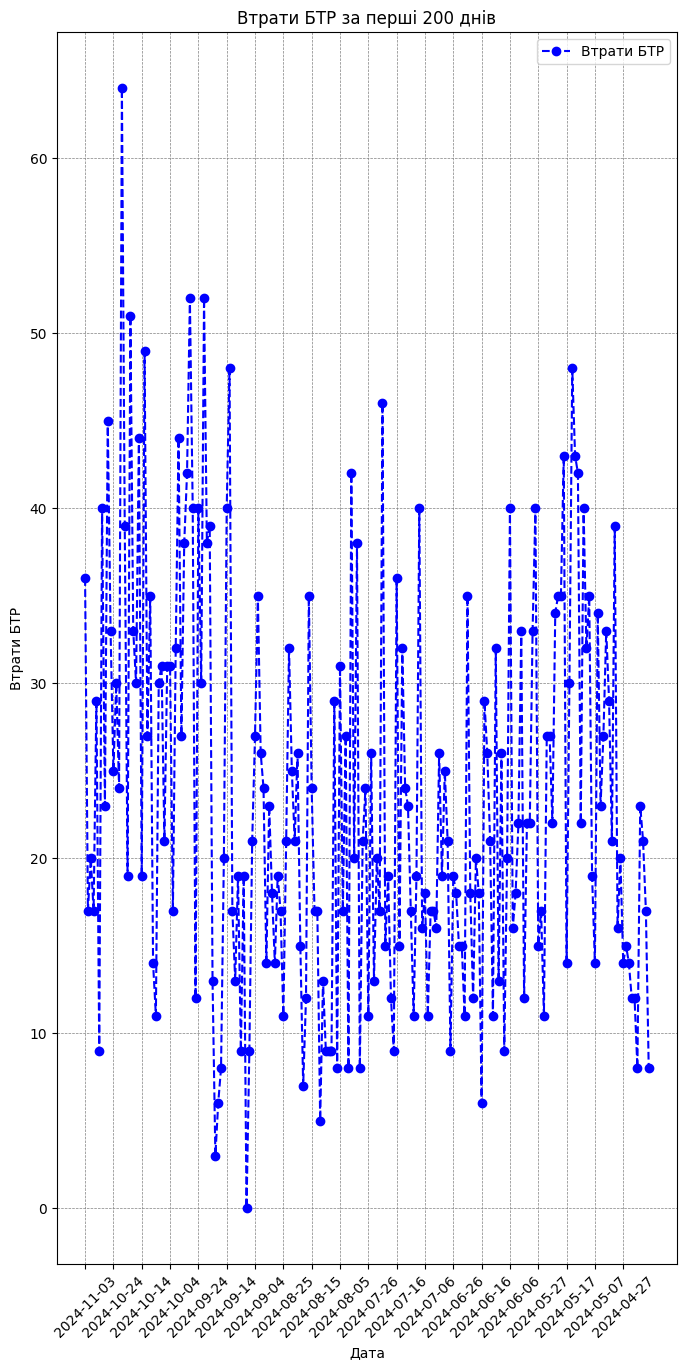

In [66]:
import matplotlib.pyplot as plt

last_200_apc_losses = daily_apc_losses[0:200]
last_200_dates = dates[0:200]

plt.figure(figsize=(8, 16), dpi=100)
plt.plot(last_200_dates, last_200_apc_losses, marker='o', linestyle='--', color='blue', label='Втрати БТР')
plt.title('Втрати БТР за перші 200 днів')
plt.xlabel('Дата')
plt.ylabel('Втрати БТР')

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

min_gap = 10
plt.xticks(ticks=np.arange(0, 200, min_gap), rotation=45)

plt.savefig('apc_losses.png')
plt.show()